# Women Entrepreurship and Labor Force



Author: Gabriella Pauline Djojosaputro <br>
Date: 23 Dec 2020 <br>
Data Source: [Kaggle](https://www.kaggle.com/babyoda/women-entrepreneurship-and-labor-force)

The aim of the study is to examine whether the 2015 Women's Entrepreneurship Index and Global Entrepreneurship Index show a significant difference between OECD countries that are members of the European Union and not, as well as to determine the significance of the relationship between the indexes.

In [71]:
#Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [4]:
#Read data into dataframe
data = pd.read_csv('Dataset3.csv',sep=';')
data

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.10
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.00
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.50
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.70
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.60
5,20,Germany,Developed,Member,Euro,63.6,67.4,0.50,69.90
6,22,Greece,Developed,Member,Euro,43.0,42.0,-1.70,42.50
7,28,Ireland,Developed,Member,Euro,64.3,65.3,-0.30,59.40
8,30,Italy,Developed,Member,Euro,51.4,41.3,0.00,47.20
9,34,Latvia,Developed,Member,Euro,56.6,54.5,0.20,66.40


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   No                                     51 non-null     int64  
 1   Country                                51 non-null     object 
 2   Level of development                   51 non-null     object 
 3   European Union Membership              51 non-null     object 
 4   Currency                               51 non-null     object 
 5   Women Entrepreneurship Index           51 non-null     float64
 6   Entrepreneurship Index                 51 non-null     float64
 7   Inflation rate                         51 non-null     float64
 8   Female Labor Force Participation Rate  51 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.7+ KB


## Task 1:
*Are **European Union membership** variable and **development** variable **independent from each other**?*

Chi-square test can be used to examine association between two categorical variables. It assumes that there is no cell with less than 5 members.

* H<sub>0</sub>: There is no association between European Union membership and the level development of the country
* H<sub>1</sub>: There is an association between European Union membership and the level development of the country

In [8]:
contingency = pd.crosstab(data['European Union Membership'],data['Level of development'])
contingency

Level of development,Developed,Developing
European Union Membership,,
Member,20,0
Not Member,7,24


Since the number of developing countries that is also a European Union Member is 0, correction need to be used during the chi-square test.

In [31]:
#Set correction to True
chisq,p,df,expected = st.chi2_contingency(contingency,correction=True)
print(f'Chi-squared: {chisq}')
print(f'p-value: {p}')
print(f'degrees of freedom: {df}')

Chi-squared: 26.222328629032262
p-value: 3.042837837948524e-07
degrees of freedom: 1


Since the p-value is 3.04e-07 < 0.05, we reject the null hypothesis. There is enough evidence to support that there is an association between European Union Membership and the level of development of the country.

In [24]:
contingency-expected

Level of development,Developed,Developing
European Union Membership,,
Member,9.411765,-9.411765
Not Member,-9.411765,9.411765


From the difference between the observed and expected records for European Union Membership and Level of development, we see that European Union members tend to be developed countries and vice versa.

## Task 2:
*Do the **Women Entrepreneurship Index** and **Global Entrepreneurship Index** values show a statistically significant difference between the countries that are **members of the European Union** and not?*

Two hypotheses are being tested<br>
* Hypothesis 1:<br>
    * H<sub>0</sub>: The population average of Women Entrepreneurship Index for European Union members are equal to non-members<br>
    * H<sub>1</sub>: The population average of Women Entrepreneurship Index for European Union members are not equal to non-members<br>
<br>
* Hypothesis 2:<br>
    * H<sub>0</sub>: The population average of Entrepreneurship Index for European Union members are equal to non-members<br>
    * H<sub>1</sub>: The population average of Entrepreneurship Index for European Union members are not equal to non-members<br>
<br>


In [39]:
data['European Union Membership'].value_counts()

Not Member    31
Member        20
Name: European Union Membership, dtype: int64

Because there is less than 30 members in the European Union, which does not satisfy the assumption for Central Limit Theorem, t-test should be used instead of z-test. <br><br>
If normality assumption and equal variance assumption are not met, the non-parametric version of t-test should be used. These are going to be tested first in the following sections.

### Normal Distribution Check

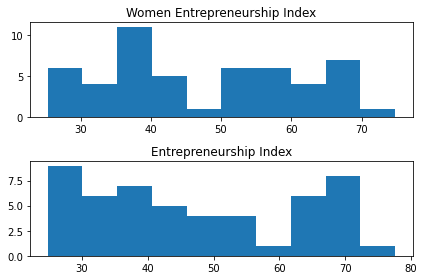

In [29]:
plt.subplots(2,1)
plt.subplot(2,1,1)
plt.hist(data['Women Entrepreneurship Index'],bins=10)
plt.title('Women Entrepreneurship Index')
plt.subplot(2,1,2)
plt.hist(data['Entrepreneurship Index'],bins=10)
plt.title('Entrepreneurship Index')
plt.tight_layout()

The histograms for both variables do not show normal distribution. The distribution shape does not look like a bell curve where the highest frequency occurs in the mean, but instead they have several peaks. <br><br>
Statistic tests can also be used to confirm this observation. If the p-value is less than the critical value of 0.05, the distribution is not normal.

In [42]:
st.shapiro(data['Women Entrepreneurship Index'])

ShapiroResult(statistic=0.9407680034637451, pvalue=0.013185255229473114)

### Equal Variance Test

Levene's test is an equal variance test with H<sub>0</sub> that the groups have equal variance. If the p-value is smaller than the critical value of 0.05, we can conclude that the variance is unequal between the groups.

In [35]:
#Equal Variance Test for Women Entrepreneurship Index
st.levene(data['Women Entrepreneurship Index'][data['European Union Membership']=='Member'], 
          data['Women Entrepreneurship Index'][data['European Union Membership']=='Not Member'],
          center='median')

LeveneResult(statistic=1.6156309727256064, pvalue=0.20970316875798875)

The p-value is 0.21 > 0.05, so we do not reject the null hypothesis. We conclude that the variance of Women Entrepreneurship Index in European Union members and non-members are **equal**.

<AxesSubplot:xlabel='European Union Membership', ylabel='Women Entrepreneurship Index'>

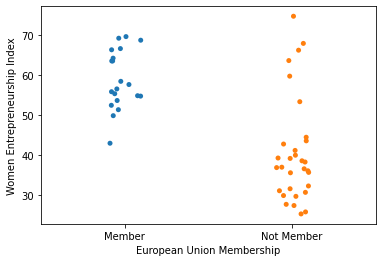

In [66]:
sns.stripplot(data=data,x='European Union Membership',y='Women Entrepreneurship Index')

In [34]:
#Equal Variance Test for Entrepreneurship Index
st.levene(data['Entrepreneurship Index'][data['European Union Membership']=='Member'], 
          data['Entrepreneurship Index'][data['European Union Membership']=='Not Member'],
          center='median')

LeveneResult(statistic=0.5931091014705794, pvalue=0.4449165957267862)

The p-value is 0.45 > 0.05, so we do not reject the null hypothesis. We conclude that the variance of Entrepreneurship Index in European Union members and non-members are **equal**.

<AxesSubplot:xlabel='European Union Membership', ylabel='Entrepreneurship Index'>

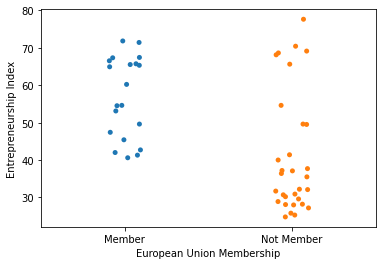

In [67]:
sns.stripplot(data=data,x='European Union Membership',y='Entrepreneurship Index')

Although the variances are equal, Women Entrepreneurship Index and Entrepreneurship Index do not have normal distribution. Therefore a non-parametric version of t-test, Mann-Whitney U test, will be used.


### Mann-Whitney U Test

In [48]:
# Mann-Whitney U Test for Women Entrepreneurship Index
st.mannwhitneyu(data['Women Entrepreneurship Index'][data['European Union Membership']=='Member'], 
          data['Women Entrepreneurship Index'][data['European Union Membership']=='Not Member'],)

MannwhitneyuResult(statistic=84.0, pvalue=6.788175847129778e-06)

The p-value is 6.79e-06 < 0.05, so we reject the null hypothesis. We conclude that the ___Women Entrepreneurship Index of European Union members are not equal to non-members___.

Text(0.5, 1.0, 'Women Entrepreneurship Index in European Union Members and Non-Members')

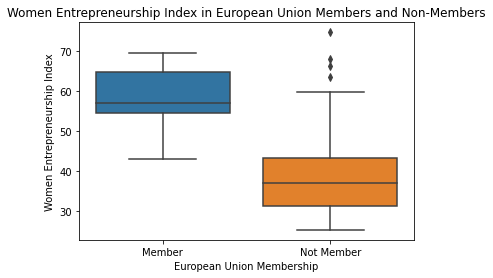

In [64]:
WEIfig = sns.boxplot(data=data,x='European Union Membership',y='Women Entrepreneurship Index')
WEIfig.set_title('Women Entrepreneurship Index in European Union Members and Non-Members')

In [47]:
# Mann-Whitney U Test for Entrepreneurship Index
st.mannwhitneyu(data['Entrepreneurship Index'][data['European Union Membership']=='Member'], 
          data['Entrepreneurship Index'][data['European Union Membership']=='Not Member'],)

MannwhitneyuResult(statistic=130.0, pvalue=0.00026689859185162853)

The p-value is 0.0002 < 0.05, so we reject the null hypothesis. We conclude that the ___Entrepreneurship Index of European Union members are not equal to non-members___.

Text(0.5, 1.0, 'Entrepreneurship Index in European Union Members and Non-Members')

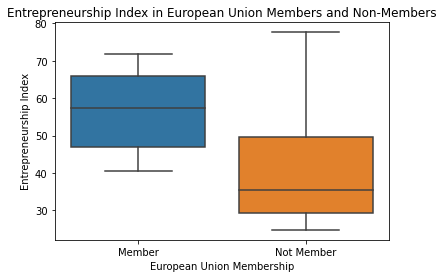

In [65]:
EIfig = sns.boxplot(data=data,x='European Union Membership',y='Entrepreneurship Index')
EIfig.set_title('Entrepreneurship Index in European Union Members and Non-Members')

## Task 3:
*Is there a statistically significant **relationship between Women's Entrepreneurship Index and Global Entrepreneurship Index values**?*

* H<sub>0</sub>: There is no correlation between Women's Entrepreneurship Index and Global Entrepreneurship Index
* H<sub>1</sub>: There is correlation between Women's Entrepreneurship Index and Global Entrepreneurship Index

Since the variables are not normally distributed, non-parametric correlation test such as Spearman or Kendall should be used instead of Pearson. Spearman will be used in this project.

In [52]:
st.spearmanr(data[['Women Entrepreneurship Index','Entrepreneurship Index']])

SpearmanrResult(correlation=0.907753920181673, pvalue=4.063302480431442e-20)

Since the p-value is less than 0.05 (4.06e-20), we reject the null hypothesis. There is a stastically significant correlation between Women Entrepreneurship Index and Entrepreneurship Index. <br><br>

The correlation value is **0.91**, indicating a ___strong positive correlation between the two variables___.

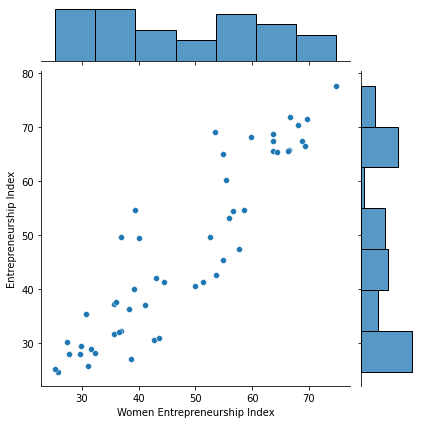

In [58]:
sns.jointplot(data=data,x='Women Entrepreneurship Index',y='Entrepreneurship Index')
